2024-12-09 22:48:31.489929: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-09 22:48:31.509344: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 22:48:31.642886: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-09 22:48:31.643010: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-09 22:48:31.681402: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

Training Linear_Regression...
Training Random_Forest...
Training Neural Network...


2024-12-09 22:48:37.827012: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected



Evaluating Linear_Regression...
Mean Absolute Error (MAE): 23248.0579367652
R² Score: 0.5427140328763543

Evaluating Random_Forest...
Mean Absolute Error (MAE): 24489.146987833017
R² Score: 0.5005137503384589

Evaluating Neural Network...
8/8 [==============================] - 0s 778us/step


/home/swiftx/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Mean Absolute Error (MAE): 33570.58734856828
R² Score: 0.09177828895796258


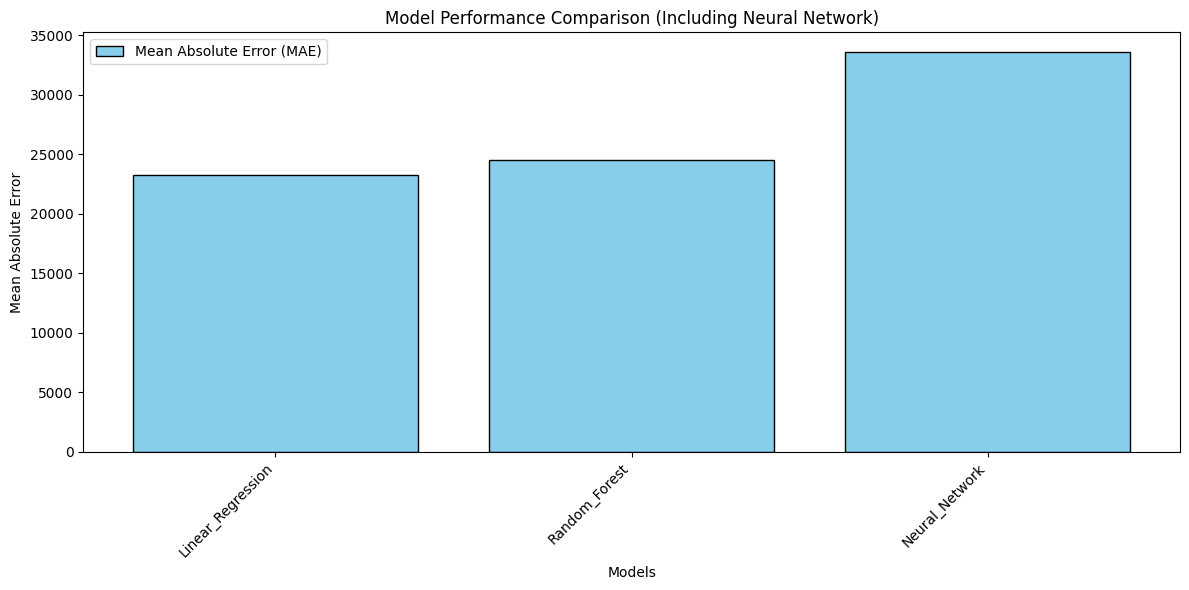

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.impute import SimpleImputer

# 1. Load and preprocess data
file_path = 'modified_data.xlsx'  # Path to the Excel file
data = pd.read_excel(file_path)

# Preprocessing
data = data.drop_duplicates()
data = data[
    (data['Property type_Apartments'] == 1) &
    (data['Price'] <= 250000) &
    (data['Gross area'] <= 250)
]
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Features and target
X = data.drop(['Price'], axis=1)
y = data['Price']

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 2. Define models
models = {
    "Linear_Regression": LinearRegression(),
    "Random_Forest": RandomForestRegressor(n_estimators=1000, random_state=42),
}

# Define neural network
def build_neural_network(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_shape))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model

# Train and save models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    joblib.dump(model, f"{name}_model.pkl")  # Save model

# Train neural network
print("Training Neural Network...")
nn_model = build_neural_network(X_train.shape[1])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
nn_model.save("Neural_Network_model.h5")

# 3. Evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "R²": r2})
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")

# Evaluate neural network
print("\nEvaluating Neural Network...")
y_pred_nn = nn_model.predict(X_test).flatten()
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
results.append({"Model": "Neural_Network", "MAE": mae_nn, "R²": r2_nn})
print(f"Mean Absolute Error (MAE): {mae_nn}")
print(f"R² Score: {r2_nn}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Visualization of metrics
plt.figure(figsize=(12, 6))
plt.bar(results_df['Model'], results_df['MAE'], color='skyblue', edgecolor='black', label='Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.title("Model Performance Comparison (Including Neural Network)")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.tight_layout()
plt.show()


Property Counts by Type:
  Property Type  Count
0    Apartments   1402
1    Commercial      3
2        Duplex     40
3          Land      0
4     Penthouse    313
5        Villas    162


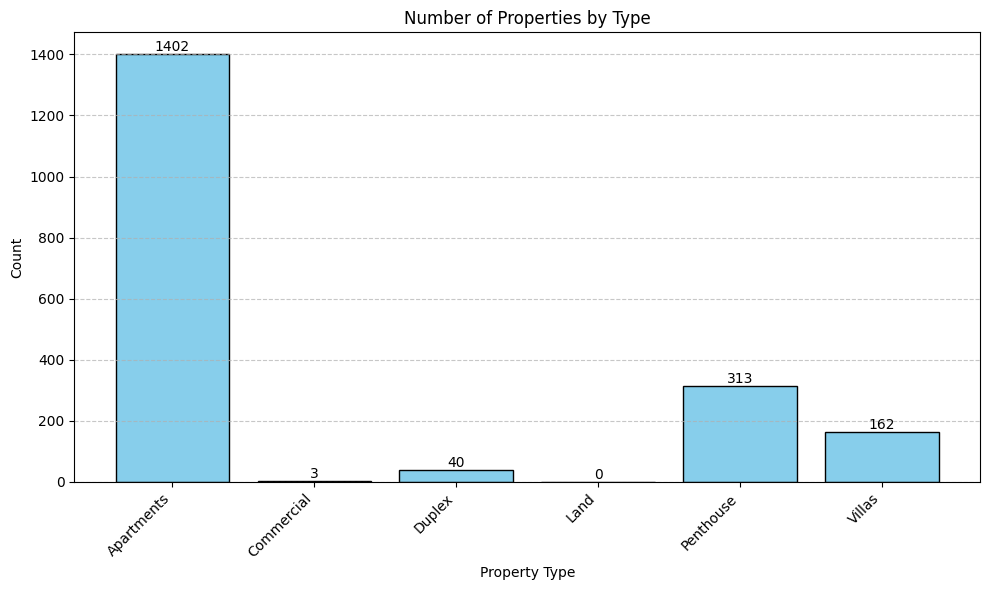

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = 'modified_data.xlsx'  # Replace with the actual file path
data = pd.read_excel(file_path)

# Define property types
property_types = [
    "Property type_Apartments",
    "Property type_Commercial",
    "Property type_Duplex",
    "Property type_Land",
    "Property type_Penthouse",
    "Property type_Villas"
]

# Count the number of properties in each category
property_counts = {}
for prop_type in property_types:
    property_counts[prop_type.replace("Property type_", "")] = data[prop_type].sum()

# Convert counts to DataFrame for visualization and display
counts_df = pd.DataFrame(list(property_counts.items()), columns=["Property Type", "Count"])
print("Property Counts by Type:")
print(counts_df)

# Visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(counts_df["Property Type"], counts_df["Count"], color="skyblue", edgecolor="black")

# Add numerical values above the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Configure plot appearance
plt.title("Number of Properties by Type")
plt.xlabel("Property Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Training Linear_Regression...
Training Random_Forest...
Training Neural Network...

Evaluating Linear_Regression...
Mean Absolute Error (MAE): 23248.0579367652
R² Score: 0.5427140328763543

Evaluating Random_Forest...
Mean Absolute Error (MAE): 24489.146987833017
R² Score: 0.5005137503384589

Evaluating Neural Network...
8/8 [==============================] - 0s 862us/step


/home/swiftx/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Mean Absolute Error (MAE): 33544.16912169603
R² Score: 0.08875446574494184

Model Evaluation Results:
               Model           MAE        R²
0  Linear_Regression  23248.057937  0.542714
1      Random_Forest  24489.146988  0.500514
2     Neural_Network  33544.169122  0.088754


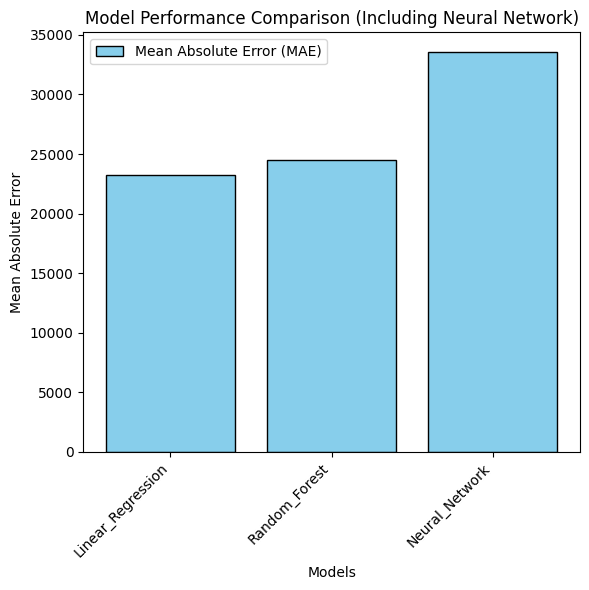

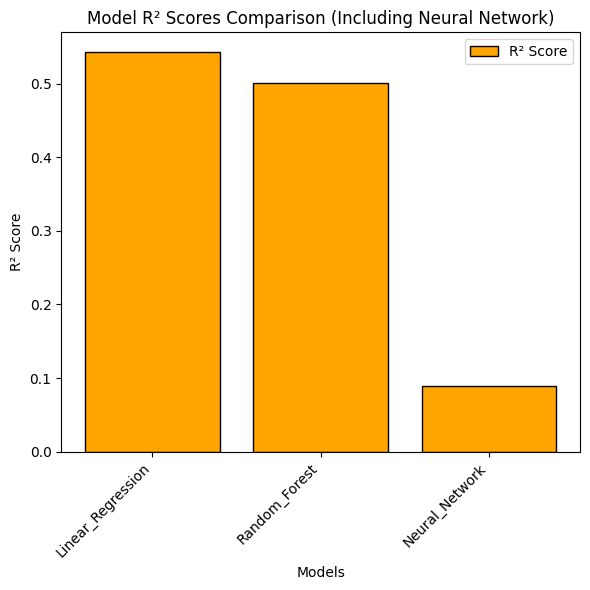

In [5]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.impute import SimpleImputer

# 1. Load and preprocess data
file_path = 'modified_data.xlsx'  # Path to the Excel file
data = pd.read_excel(file_path)

# Preprocessing
data = data.drop_duplicates()
data = data[
    (data['Property type_Apartments'] == 1) &
    (data['Price'] <= 250000) &
    (data['Gross area'] <= 250)
]
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Features and target
X = data.drop(['Price'], axis=1)
y = data['Price']

# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 2. Define models
models = {
    "Linear_Regression": LinearRegression(),
    #"Ridge_Regression": Ridge(alpha=1.0),
    #"Lasso_Regression": Lasso(alpha=0.1),
    #"ElasticNet_Regression": ElasticNet(alpha=0.1, l1_ratio=0.5),
    #"Decision_Tree": DecisionTreeRegressor(random_state=42),
    "Random_Forest": RandomForestRegressor(n_estimators=1000, random_state=42),
    #"Gradient_Boosting": GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, random_state=42),
    #"XGBoost": XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=5, random_state=42),
    #"SVR": SVR(kernel='rbf', C=100, gamma=0.1),
    #"KNN": KNeighborsRegressor(n_neighbors=5),
    #"CatBoost": CatBoostRegressor(iterations=1000, learning_rate=0.01, depth=5, silent=True, random_state=42),
}

# Define neural network
def build_neural_network(input_shape):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_shape))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error', metrics=['mean_absolute_error'])
    return model

# Train and save models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    joblib.dump(model, f"{name}_model.pkl")  # Save model

# Train neural network
print("Training Neural Network...")
nn_model = build_neural_network(X_train.shape[1])
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), verbose=0)
nn_model.save("Neural_Network_model.h5")

# 3. Evaluate models
results = []
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "MAE": mae, "R²": r2})
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R² Score: {r2}")

# Evaluate neural network
print("\nEvaluating Neural Network...")
y_pred_nn = nn_model.predict(X_test).flatten()
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)
results.append({"Model": "Neural_Network", "MAE": mae_nn, "R²": r2_nn})
print(f"Mean Absolute Error (MAE): {mae_nn}")
print(f"R² Score: {r2_nn}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display results as a table
print("\nModel Evaluation Results:")
print(results_df)

# Visualization of metrics
plt.figure(figsize=(6, 6))
plt.bar(results_df['Model'], results_df['MAE'], color='skyblue', edgecolor='black', label='Mean Absolute Error (MAE)')
plt.xticks(rotation=45, ha='right')
plt.title("Model Performance Comparison (Including Neural Network)")
plt.xlabel("Models")
plt.ylabel("Mean Absolute Error")
plt.legend()
plt.tight_layout()
plt.show()

# Display R² scores in a separate bar chart
plt.figure(figsize=(6, 6))
plt.bar(results_df['Model'], results_df['R²'], color='orange', edgecolor='black', label='R² Score')
plt.xticks(rotation=45, ha='right')
plt.title("Model R² Scores Comparison (Including Neural Network)")
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.legend()
plt.tight_layout()
plt.show()
